In [2]:
from __future__ import absolute_import, division, print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append("../gym-sepsis/")
import gym_sepsis
from gym_sepsis.envs.sepsis_env import SepsisEnv


In [3]:
data = np.load("processed_data.npz")
df = pd.read_csv("../cs238_sepsis_rl/data/test_state_action_reward_df.csv")

In [4]:
sepsis_env = SepsisEnv()

In [5]:
x = data['x_test']
y = data['y_test']

In [6]:
columns = ['ALBUMIN', 'ANION GAP', 'BANDS', 'BICARBONATE',
       'BILIRUBIN', 'BUN', 'CHLORIDE', 'CREATININE', 'DiasBP', 'Glucose',
       'GLUCOSE', 'HeartRate', 'HEMATOCRIT', 'HEMOGLOBIN', 'INR', 'LACTATE',
       'MeanBP', 'PaCO2', 'PLATELET', 'POTASSIUM', 'PT', 'PTT', 'RespRate',
       'SODIUM', 'SpO2', 'SysBP', 'TempC', 'WBC', 'age', 'is_male',
       'race_white', 'race_black', 'race_hispanic', 'race_other', 'height',
       'weight', 'vent', 'sofa', 'lods', 'sirs', 'qsofa', 'qsofa_sysbp_score',
       'qsofa_gcs_score', 'qsofa_resprate_score', 'elixhauser_hospital',
       'blood_culture_positive']


In [7]:
episodes = df.groupby(["subject_id","hadm_id","icustay_id"])
len(df)

39232

In [8]:
subject_id = None
hadm_id = None
icustay_id = None

episodes = df.groupby(["subject_id","hadm_id","icustay_id"])

simulated_episodes = []
rewards = []

squared_sums = 0

counter = 1


for name, episode in episodes:
    # for each episode, play it back on it simulator
    episode_vals = episode.values
    actions = episode_vals[:,list(episode.columns).index("discrete_action")]
    simulated_episode = []
    starting_state = episode.iloc[0][columns].values[:46]
    sepsis_env.reset(starting_state=starting_state)
    done = False
    
    if counter %200 == 0:
        print("done with %f of episodes..." % (counter/len(episodes)))
        print(squared_sums)
    counter +=1
    simulated_episode.append(starting_state)
    for action in actions:
        if done:
            # simulated episode has ended but the real episode has not
            simulated_episode.append(np.zeros(46))
        if not done:
            state, reward, done, _ = sepsis_env.step(action)
            rewards.append(reward)
            simulated_episode.append(state)
    
    # calculate differences
    squared_sum = 0
    index = 0
    for _, step in episode.iterrows():
        diff = step[columns].values - simulated_episode[index].reshape(46)
        diff = np.square(diff)
        squared_sum += diff
        index += 1
        
    for idx in range(index +1 ,len(simulated_episode)):
        squared_sum += np.square(simulated_episode[idx])
        
    squared_sums += squared_sum


print(squared_sums)    

done with 0.058445 of episodes...
[905.1908281292622 1723.0518725605211 503.69353095831707
 1526.4841504334327 1595.2210614613903 1229.2822676447765
 1817.5339818677999 753.8528930466979 1908.6423279022013
 3.1075588179175133 1753.5954111485582 1550.1236252692 1204.1396434624842
 1196.2755162565122 1658.3217386652736 3898.857247976232
 1919.3655518723172 1207.8655793692853 1073.2964373192297
 1952.5008410492926 616.3410193592663 2219.106332881134 2423.0256777157033
 1480.8980933859916 3243.47281918643 1809.456531024346 1901.9167985564334
 938.882702167242 389.7480441226646 534.5720771306867 606.0279782272862
 632.8625717812301 174.65920496231658 734.4404735220234 230.765200220504
 296.6261509684861 540.3572137732971 645.8069977505829 467.62046318638784
 549.305646379192 524.9406207742493 530.5610347449375 518.8134911380541
 363.90048996805064 439.96645534158625 518.6754384557557]
done with 0.116891 of episodes...
[1599.198324945671 2967.1273199584243 1083.7277912970562
 3413.3668473038

done with 0.642899 of episodes...
[8886.702914118607 15651.2190558272 3509.4445838983797 16303.34811173088
 5631.184533127597 10114.01000604803 16626.26799664882 8343.881618320725
 20071.80999110288 30.043731666250462 17179.06497506334 18487.991468948523
 13598.549394332127 13712.072263717859 15336.058371530293
 25114.855773373725 19424.838304015044 16531.434881915382 12424.435551084
 17865.39908239634 13590.694180972234 19771.374290240667
 22472.630077516296 15074.773249177724 24922.85764296092
 18801.058466856004 20114.479942282986 13081.921584116339
 5110.704398955346 5545.7282560321255 5377.498479886378 4497.066107479259
 5082.165569952724 6028.414721819483 7791.268683695758 3828.304424598732
 5662.044739094349 6340.063896339116 5671.601135400411 5845.03284208798
 5947.6664658532045 5816.564814903213 5597.573525088991 5665.015164515099
 6159.628901735032 5876.610664189296]
done with 0.701344 of episodes...
[9694.564121309779 17102.991710941995 3796.856342719494 17786.253026226554
 

In [9]:
episodes = df.groupby(["subject_id","hadm_id","icustay_id"])

lengths = []
rewards = []

counter = 1


for name, episode in episodes:
    # for each episode, play it back on it simulator
    episode_vals = episode.values
    actions = episode_vals[:,list(episode.columns).index("discrete_action")]
    simulated_episode = []
    starting_state = episode.iloc[0][columns].values[:46]
    sepsis_env.reset(starting_state=starting_state)
    
    if counter %200 == 0:
        print("done with %f of episodes..." % (counter/len(episodes)))
        print(lengths)
    counter +=1
    simulated_episode.append(starting_state)
    
    done = False
    for action in actions:
        state, reward, done, _ = sepsis_env.step(action)
        rewards.append(reward)
        simulated_episode.append(state)
        if done:
            break
    
    lengths.append(len(simulated_episode))

done with 0.058445 of episodes...
[7, 10, 4, 11, 9, 4, 10, 11, 11, 10, 11, 4, 11, 11, 6, 3, 10, 11, 10, 10, 11, 11, 11, 11, 12, 10, 11, 11, 11, 11, 3, 11, 9, 10, 10, 10, 10, 11, 11, 9, 11, 10, 11, 11, 11, 4, 5, 12, 10, 12, 10, 11, 7, 11, 10, 11, 11, 10, 8, 11, 11, 11, 10, 6, 10, 9, 10, 11, 9, 11, 10, 4, 10, 10, 11, 10, 10, 10, 11, 9, 11, 10, 12, 10, 12, 11, 12, 10, 11, 10, 2, 11, 10, 11, 11, 8, 10, 10, 11, 9, 10, 9, 11, 11, 9, 12, 10, 11, 4, 10, 11, 11, 8, 11, 7, 11, 10, 11, 4, 4, 5, 12, 11, 12, 2, 12, 11, 11, 11, 11, 11, 11, 12, 10, 4, 10, 11, 6, 11, 10, 11, 11, 7, 11, 12, 11, 10, 10, 8, 11, 3, 11, 12, 11, 9, 11, 10, 10, 11, 11, 6, 10, 5, 11, 11, 11, 11, 10, 11, 6, 11, 7, 7, 11, 11, 11, 11, 10, 12, 11, 10, 11, 11, 10, 11, 11, 10, 10, 12, 10, 3, 11, 11, 10, 10, 11, 10, 11, 11]
done with 0.116891 of episodes...
[7, 10, 4, 11, 9, 4, 10, 11, 11, 10, 11, 4, 11, 11, 6, 3, 10, 11, 10, 10, 11, 11, 11, 11, 12, 10, 11, 11, 11, 11, 3, 11, 9, 10, 10, 10, 10, 11, 11, 9, 11, 10, 11, 11, 11, 4, 5, 1

done with 0.350672 of episodes...
[7, 10, 4, 11, 9, 4, 10, 11, 11, 10, 11, 4, 11, 11, 6, 3, 10, 11, 10, 10, 11, 11, 11, 11, 12, 10, 11, 11, 11, 11, 3, 11, 9, 10, 10, 10, 10, 11, 11, 9, 11, 10, 11, 11, 11, 4, 5, 12, 10, 12, 10, 11, 7, 11, 10, 11, 11, 10, 8, 11, 11, 11, 10, 6, 10, 9, 10, 11, 9, 11, 10, 4, 10, 10, 11, 10, 10, 10, 11, 9, 11, 10, 12, 10, 12, 11, 12, 10, 11, 10, 2, 11, 10, 11, 11, 8, 10, 10, 11, 9, 10, 9, 11, 11, 9, 12, 10, 11, 4, 10, 11, 11, 8, 11, 7, 11, 10, 11, 4, 4, 5, 12, 11, 12, 2, 12, 11, 11, 11, 11, 11, 11, 12, 10, 4, 10, 11, 6, 11, 10, 11, 11, 7, 11, 12, 11, 10, 10, 8, 11, 3, 11, 12, 11, 9, 11, 10, 10, 11, 11, 6, 10, 5, 11, 11, 11, 11, 10, 11, 6, 11, 7, 7, 11, 11, 11, 11, 10, 12, 11, 10, 11, 11, 10, 11, 11, 10, 10, 12, 10, 3, 11, 11, 10, 10, 11, 10, 11, 11, 3, 6, 10, 11, 11, 11, 11, 10, 5, 12, 11, 8, 11, 11, 11, 8, 11, 11, 10, 11, 10, 11, 10, 11, 9, 11, 11, 4, 10, 12, 9, 10, 12, 10, 11, 11, 11, 11, 10, 11, 2, 11, 11, 10, 3, 11, 11, 11, 10, 4, 10, 11, 11, 9, 10, 11, 

done with 0.467563 of episodes...
[7, 10, 4, 11, 9, 4, 10, 11, 11, 10, 11, 4, 11, 11, 6, 3, 10, 11, 10, 10, 11, 11, 11, 11, 12, 10, 11, 11, 11, 11, 3, 11, 9, 10, 10, 10, 10, 11, 11, 9, 11, 10, 11, 11, 11, 4, 5, 12, 10, 12, 10, 11, 7, 11, 10, 11, 11, 10, 8, 11, 11, 11, 10, 6, 10, 9, 10, 11, 9, 11, 10, 4, 10, 10, 11, 10, 10, 10, 11, 9, 11, 10, 12, 10, 12, 11, 12, 10, 11, 10, 2, 11, 10, 11, 11, 8, 10, 10, 11, 9, 10, 9, 11, 11, 9, 12, 10, 11, 4, 10, 11, 11, 8, 11, 7, 11, 10, 11, 4, 4, 5, 12, 11, 12, 2, 12, 11, 11, 11, 11, 11, 11, 12, 10, 4, 10, 11, 6, 11, 10, 11, 11, 7, 11, 12, 11, 10, 10, 8, 11, 3, 11, 12, 11, 9, 11, 10, 10, 11, 11, 6, 10, 5, 11, 11, 11, 11, 10, 11, 6, 11, 7, 7, 11, 11, 11, 11, 10, 12, 11, 10, 11, 11, 10, 11, 11, 10, 10, 12, 10, 3, 11, 11, 10, 10, 11, 10, 11, 11, 3, 6, 10, 11, 11, 11, 11, 10, 5, 12, 11, 8, 11, 11, 11, 8, 11, 11, 10, 11, 10, 11, 10, 11, 9, 11, 11, 4, 10, 12, 9, 10, 12, 10, 11, 11, 11, 11, 10, 11, 2, 11, 11, 10, 3, 11, 11, 11, 10, 4, 10, 11, 11, 9, 10, 11, 

done with 0.584454 of episodes...
[7, 10, 4, 11, 9, 4, 10, 11, 11, 10, 11, 4, 11, 11, 6, 3, 10, 11, 10, 10, 11, 11, 11, 11, 12, 10, 11, 11, 11, 11, 3, 11, 9, 10, 10, 10, 10, 11, 11, 9, 11, 10, 11, 11, 11, 4, 5, 12, 10, 12, 10, 11, 7, 11, 10, 11, 11, 10, 8, 11, 11, 11, 10, 6, 10, 9, 10, 11, 9, 11, 10, 4, 10, 10, 11, 10, 10, 10, 11, 9, 11, 10, 12, 10, 12, 11, 12, 10, 11, 10, 2, 11, 10, 11, 11, 8, 10, 10, 11, 9, 10, 9, 11, 11, 9, 12, 10, 11, 4, 10, 11, 11, 8, 11, 7, 11, 10, 11, 4, 4, 5, 12, 11, 12, 2, 12, 11, 11, 11, 11, 11, 11, 12, 10, 4, 10, 11, 6, 11, 10, 11, 11, 7, 11, 12, 11, 10, 10, 8, 11, 3, 11, 12, 11, 9, 11, 10, 10, 11, 11, 6, 10, 5, 11, 11, 11, 11, 10, 11, 6, 11, 7, 7, 11, 11, 11, 11, 10, 12, 11, 10, 11, 11, 10, 11, 11, 10, 10, 12, 10, 3, 11, 11, 10, 10, 11, 10, 11, 11, 3, 6, 10, 11, 11, 11, 11, 10, 5, 12, 11, 8, 11, 11, 11, 8, 11, 11, 10, 11, 10, 11, 10, 11, 9, 11, 11, 4, 10, 12, 9, 10, 12, 10, 11, 11, 11, 11, 10, 11, 2, 11, 11, 10, 3, 11, 11, 11, 10, 4, 10, 11, 11, 9, 10, 11, 

done with 0.701344 of episodes...
[7, 10, 4, 11, 9, 4, 10, 11, 11, 10, 11, 4, 11, 11, 6, 3, 10, 11, 10, 10, 11, 11, 11, 11, 12, 10, 11, 11, 11, 11, 3, 11, 9, 10, 10, 10, 10, 11, 11, 9, 11, 10, 11, 11, 11, 4, 5, 12, 10, 12, 10, 11, 7, 11, 10, 11, 11, 10, 8, 11, 11, 11, 10, 6, 10, 9, 10, 11, 9, 11, 10, 4, 10, 10, 11, 10, 10, 10, 11, 9, 11, 10, 12, 10, 12, 11, 12, 10, 11, 10, 2, 11, 10, 11, 11, 8, 10, 10, 11, 9, 10, 9, 11, 11, 9, 12, 10, 11, 4, 10, 11, 11, 8, 11, 7, 11, 10, 11, 4, 4, 5, 12, 11, 12, 2, 12, 11, 11, 11, 11, 11, 11, 12, 10, 4, 10, 11, 6, 11, 10, 11, 11, 7, 11, 12, 11, 10, 10, 8, 11, 3, 11, 12, 11, 9, 11, 10, 10, 11, 11, 6, 10, 5, 11, 11, 11, 11, 10, 11, 6, 11, 7, 7, 11, 11, 11, 11, 10, 12, 11, 10, 11, 11, 10, 11, 11, 10, 10, 12, 10, 3, 11, 11, 10, 10, 11, 10, 11, 11, 3, 6, 10, 11, 11, 11, 11, 10, 5, 12, 11, 8, 11, 11, 11, 8, 11, 11, 10, 11, 10, 11, 10, 11, 9, 11, 11, 4, 10, 12, 9, 10, 12, 10, 11, 11, 11, 11, 10, 11, 2, 11, 11, 10, 3, 11, 11, 11, 10, 4, 10, 11, 11, 9, 10, 11, 

done with 0.759790 of episodes...
[7, 10, 4, 11, 9, 4, 10, 11, 11, 10, 11, 4, 11, 11, 6, 3, 10, 11, 10, 10, 11, 11, 11, 11, 12, 10, 11, 11, 11, 11, 3, 11, 9, 10, 10, 10, 10, 11, 11, 9, 11, 10, 11, 11, 11, 4, 5, 12, 10, 12, 10, 11, 7, 11, 10, 11, 11, 10, 8, 11, 11, 11, 10, 6, 10, 9, 10, 11, 9, 11, 10, 4, 10, 10, 11, 10, 10, 10, 11, 9, 11, 10, 12, 10, 12, 11, 12, 10, 11, 10, 2, 11, 10, 11, 11, 8, 10, 10, 11, 9, 10, 9, 11, 11, 9, 12, 10, 11, 4, 10, 11, 11, 8, 11, 7, 11, 10, 11, 4, 4, 5, 12, 11, 12, 2, 12, 11, 11, 11, 11, 11, 11, 12, 10, 4, 10, 11, 6, 11, 10, 11, 11, 7, 11, 12, 11, 10, 10, 8, 11, 3, 11, 12, 11, 9, 11, 10, 10, 11, 11, 6, 10, 5, 11, 11, 11, 11, 10, 11, 6, 11, 7, 7, 11, 11, 11, 11, 10, 12, 11, 10, 11, 11, 10, 11, 11, 10, 10, 12, 10, 3, 11, 11, 10, 10, 11, 10, 11, 11, 3, 6, 10, 11, 11, 11, 11, 10, 5, 12, 11, 8, 11, 11, 11, 8, 11, 11, 10, 11, 10, 11, 10, 11, 9, 11, 11, 4, 10, 12, 9, 10, 12, 10, 11, 11, 11, 11, 10, 11, 2, 11, 11, 10, 3, 11, 11, 11, 10, 4, 10, 11, 11, 9, 10, 11, 

done with 0.818235 of episodes...
[7, 10, 4, 11, 9, 4, 10, 11, 11, 10, 11, 4, 11, 11, 6, 3, 10, 11, 10, 10, 11, 11, 11, 11, 12, 10, 11, 11, 11, 11, 3, 11, 9, 10, 10, 10, 10, 11, 11, 9, 11, 10, 11, 11, 11, 4, 5, 12, 10, 12, 10, 11, 7, 11, 10, 11, 11, 10, 8, 11, 11, 11, 10, 6, 10, 9, 10, 11, 9, 11, 10, 4, 10, 10, 11, 10, 10, 10, 11, 9, 11, 10, 12, 10, 12, 11, 12, 10, 11, 10, 2, 11, 10, 11, 11, 8, 10, 10, 11, 9, 10, 9, 11, 11, 9, 12, 10, 11, 4, 10, 11, 11, 8, 11, 7, 11, 10, 11, 4, 4, 5, 12, 11, 12, 2, 12, 11, 11, 11, 11, 11, 11, 12, 10, 4, 10, 11, 6, 11, 10, 11, 11, 7, 11, 12, 11, 10, 10, 8, 11, 3, 11, 12, 11, 9, 11, 10, 10, 11, 11, 6, 10, 5, 11, 11, 11, 11, 10, 11, 6, 11, 7, 7, 11, 11, 11, 11, 10, 12, 11, 10, 11, 11, 10, 11, 11, 10, 10, 12, 10, 3, 11, 11, 10, 10, 11, 10, 11, 11, 3, 6, 10, 11, 11, 11, 11, 10, 5, 12, 11, 8, 11, 11, 11, 8, 11, 11, 10, 11, 10, 11, 10, 11, 9, 11, 11, 4, 10, 12, 9, 10, 12, 10, 11, 11, 11, 11, 10, 11, 2, 11, 11, 10, 3, 11, 11, 11, 10, 4, 10, 11, 11, 9, 10, 11, 

done with 0.876680 of episodes...
[7, 10, 4, 11, 9, 4, 10, 11, 11, 10, 11, 4, 11, 11, 6, 3, 10, 11, 10, 10, 11, 11, 11, 11, 12, 10, 11, 11, 11, 11, 3, 11, 9, 10, 10, 10, 10, 11, 11, 9, 11, 10, 11, 11, 11, 4, 5, 12, 10, 12, 10, 11, 7, 11, 10, 11, 11, 10, 8, 11, 11, 11, 10, 6, 10, 9, 10, 11, 9, 11, 10, 4, 10, 10, 11, 10, 10, 10, 11, 9, 11, 10, 12, 10, 12, 11, 12, 10, 11, 10, 2, 11, 10, 11, 11, 8, 10, 10, 11, 9, 10, 9, 11, 11, 9, 12, 10, 11, 4, 10, 11, 11, 8, 11, 7, 11, 10, 11, 4, 4, 5, 12, 11, 12, 2, 12, 11, 11, 11, 11, 11, 11, 12, 10, 4, 10, 11, 6, 11, 10, 11, 11, 7, 11, 12, 11, 10, 10, 8, 11, 3, 11, 12, 11, 9, 11, 10, 10, 11, 11, 6, 10, 5, 11, 11, 11, 11, 10, 11, 6, 11, 7, 7, 11, 11, 11, 11, 10, 12, 11, 10, 11, 11, 10, 11, 11, 10, 10, 12, 10, 3, 11, 11, 10, 10, 11, 10, 11, 11, 3, 6, 10, 11, 11, 11, 11, 10, 5, 12, 11, 8, 11, 11, 11, 8, 11, 11, 10, 11, 10, 11, 10, 11, 9, 11, 11, 4, 10, 12, 9, 10, 12, 10, 11, 11, 11, 11, 10, 11, 2, 11, 11, 10, 3, 11, 11, 11, 10, 4, 10, 11, 11, 9, 10, 11, 

done with 0.935126 of episodes...
[7, 10, 4, 11, 9, 4, 10, 11, 11, 10, 11, 4, 11, 11, 6, 3, 10, 11, 10, 10, 11, 11, 11, 11, 12, 10, 11, 11, 11, 11, 3, 11, 9, 10, 10, 10, 10, 11, 11, 9, 11, 10, 11, 11, 11, 4, 5, 12, 10, 12, 10, 11, 7, 11, 10, 11, 11, 10, 8, 11, 11, 11, 10, 6, 10, 9, 10, 11, 9, 11, 10, 4, 10, 10, 11, 10, 10, 10, 11, 9, 11, 10, 12, 10, 12, 11, 12, 10, 11, 10, 2, 11, 10, 11, 11, 8, 10, 10, 11, 9, 10, 9, 11, 11, 9, 12, 10, 11, 4, 10, 11, 11, 8, 11, 7, 11, 10, 11, 4, 4, 5, 12, 11, 12, 2, 12, 11, 11, 11, 11, 11, 11, 12, 10, 4, 10, 11, 6, 11, 10, 11, 11, 7, 11, 12, 11, 10, 10, 8, 11, 3, 11, 12, 11, 9, 11, 10, 10, 11, 11, 6, 10, 5, 11, 11, 11, 11, 10, 11, 6, 11, 7, 7, 11, 11, 11, 11, 10, 12, 11, 10, 11, 11, 10, 11, 11, 10, 10, 12, 10, 3, 11, 11, 10, 10, 11, 10, 11, 11, 3, 6, 10, 11, 11, 11, 11, 10, 5, 12, 11, 8, 11, 11, 11, 8, 11, 11, 10, 11, 10, 11, 10, 11, 9, 11, 11, 4, 10, 12, 9, 10, 12, 10, 11, 11, 11, 11, 10, 11, 2, 11, 11, 10, 3, 11, 11, 11, 10, 4, 10, 11, 11, 9, 10, 11, 

done with 0.993571 of episodes...
[7, 10, 4, 11, 9, 4, 10, 11, 11, 10, 11, 4, 11, 11, 6, 3, 10, 11, 10, 10, 11, 11, 11, 11, 12, 10, 11, 11, 11, 11, 3, 11, 9, 10, 10, 10, 10, 11, 11, 9, 11, 10, 11, 11, 11, 4, 5, 12, 10, 12, 10, 11, 7, 11, 10, 11, 11, 10, 8, 11, 11, 11, 10, 6, 10, 9, 10, 11, 9, 11, 10, 4, 10, 10, 11, 10, 10, 10, 11, 9, 11, 10, 12, 10, 12, 11, 12, 10, 11, 10, 2, 11, 10, 11, 11, 8, 10, 10, 11, 9, 10, 9, 11, 11, 9, 12, 10, 11, 4, 10, 11, 11, 8, 11, 7, 11, 10, 11, 4, 4, 5, 12, 11, 12, 2, 12, 11, 11, 11, 11, 11, 11, 12, 10, 4, 10, 11, 6, 11, 10, 11, 11, 7, 11, 12, 11, 10, 10, 8, 11, 3, 11, 12, 11, 9, 11, 10, 10, 11, 11, 6, 10, 5, 11, 11, 11, 11, 10, 11, 6, 11, 7, 7, 11, 11, 11, 11, 10, 12, 11, 10, 11, 11, 10, 11, 11, 10, 10, 12, 10, 3, 11, 11, 10, 10, 11, 10, 11, 11, 3, 6, 10, 11, 11, 11, 11, 10, 5, 12, 11, 8, 11, 11, 11, 8, 11, 11, 10, 11, 10, 11, 10, 11, 9, 11, 11, 4, 10, 12, 9, 10, 12, 10, 11, 11, 11, 11, 10, 11, 2, 11, 11, 10, 3, 11, 11, 11, 10, 4, 10, 11, 11, 9, 10, 11, 

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4, 15.5]),
 <a list of 10 Patch objects>)

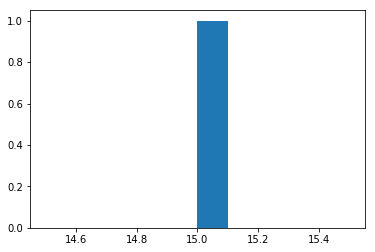

In [10]:
plt.hist(reward)

Text(0.5, 1.0, "Rewards for Physician's Policy on Simulator")

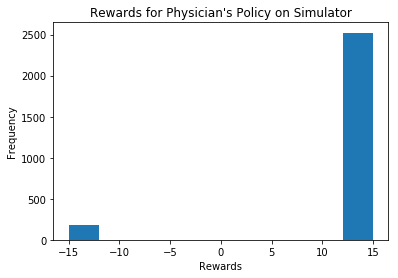

In [11]:
rewards = np.array(rewards)
rewards = rewards[np.abs(rewards) > 0]
plt.hist(rewards)
plt.xlabel('Rewards')
plt.ylabel('Frequency')
plt.title('Rewards for Physician\'s Policy on Simulator')

Text(0.5, 1.0, "Rewards for Physician's Policy in Real World")

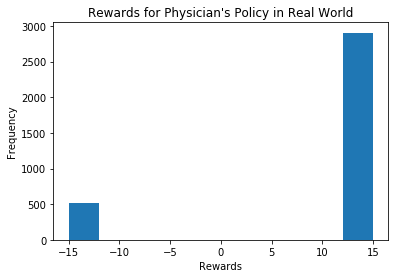

In [12]:
plt.hist(episodes.sum()["reward"])
plt.xlabel('Rewards')
plt.ylabel('Frequency')
plt.title('Rewards for Physician\'s Policy in Real World')

Text(0.5, 1.0, "Length of Episdoe for Physician's Policy in Real World")

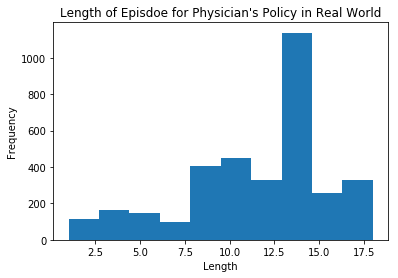

In [13]:
plt.hist(episodes.count()["reward"])
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Length of Episdoe for Physician\'s Policy in Real World')

In [14]:
normalized_squared_sums = squared_sums/np.sum(np.square(df[columns].values), axis=0)

In [15]:
normalized_squared_sums.shape

(46,)

Text(0.5, 1.0, 'Normalized Trajectory Loss Across Features')

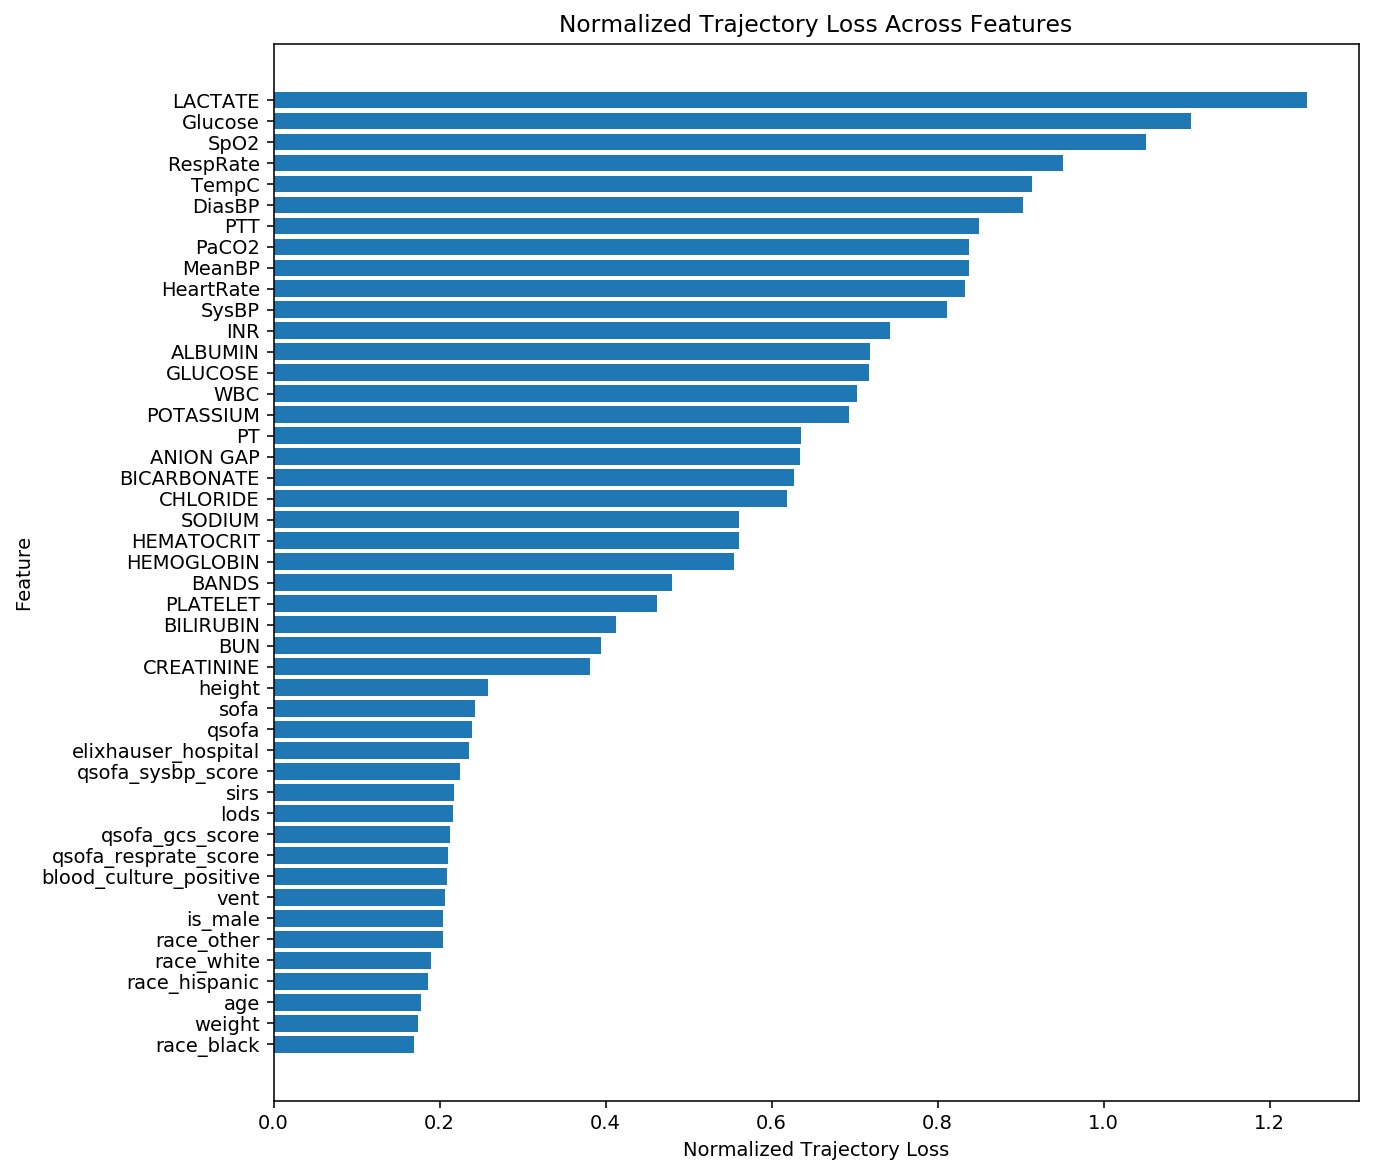

In [16]:
labels = [x for _,x in sorted(zip(normalized_squared_sums, columns))]


pos = np.arange(len(labels))

plt.figure(num=None, figsize=(10, 10), dpi=140)
plt.barh(width=sorted(normalized_squared_sums), y=pos)
plt.yticks(pos, labels)
plt.xlabel('Normalized Trajectory Loss')
plt.ylabel('Feature')
plt.title('Normalized Trajectory Loss Across Features')

Text(0.5, 1.0, "Length of Episdoes Using Physician's Policy in Real World")

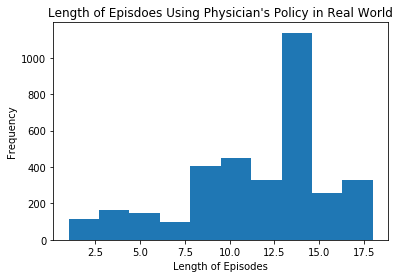

In [17]:
plt.hist(episodes.count()["race_black"].values)
plt.xlabel('Length of Episodes')
plt.ylabel('Frequency')
plt.title('Length of Episdoes Using Physician\'s Policy in Real World')